In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [5]:
dfbcn = pd.read_csv('../Data/sale_Barcelona.csv', delimiter = ',')

In [6]:
print(dfbcn.columns.tolist())

['id', 'price', 'currency', 'latitude', 'longitude', 'sq_meters', 'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'doorman', 'pool', 'ac', 'heating', 'year_built', 'quality', 'city', 'neighborhood', 'dist_city_center', 'furniture', 'garage', 'property_type', 'garden', 'closest_station', 'dist_closest_station', 'created_at', 'last_seen']


In [7]:
dfbcn.head(5)

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,320294,150000,€,41.459649,2.174793,63.0,67,3,1,NaN,...,Ciutat Meridiana - Torre Baró - Vallbona,7.990993,NaN,NaN,piso,NaN,Ciutat Meridiana,0.121438,9/3/2021 10:16,11/12/2021 13:50
1,1786997,150000,€,41.422081,2.155370,48.0,52,2,1,NaN,...,El Carmel,3.991000,NaN,NaN,piso,NaN,El Carmel,0.277336,9/3/2021 10:16,11/12/2021 13:50
2,1787143,395000,€,41.402928,2.207851,84.0,91,2,2,NaN,...,El Poblenou,3.579261,NaN,NaN,duplex,NaN,Poblenou,0.383878,8/30/2021 12:17,8/30/2021 12:17
3,1976767,540000,€,41.394692,2.144422,NaN,100,3,1,NaN,...,Sant Gervasi - Galvany,2.257852,NaN,1.0,piso,NaN,Hospital Clínic,0.875652,9/1/2021 14:04,9/2/2021 13:50
4,27972575,650000,€,41.398971,2.120754,NaN,141,3,2,NaN,...,Sarrià,4.283368,NaN,1.0,piso,NaN,Maria Cristina,1.310073,8/29/2021 11:47,9/2/2021 11:01


In [8]:
# We check how many rows and columns we have
print(dfbcn.shape)

(5847, 33)


In [9]:
#Now we check the data types of the columns
print(dfbcn.dtypes)

id                        int64
price                     int64
currency                 object
latitude                float64
longitude               float64
sq_meters               float64
sq_meters_built           int64
rooms                     int64
bathrooms                 int64
balcony                 float64
terrace                 float64
exterior                float64
orientation              object
floor                   float64
rooftop                 float64
elevator                float64
doorman                 float64
pool                    float64
ac                      float64
heating                  object
year_built              float64
quality                   int64
city                     object
neighborhood             object
dist_city_center        float64
furniture               float64
garage                  float64
property_type            object
garden                  float64
closest_station          object
dist_closest_station    float64
created_

In [10]:
 # Select only the numeric features
numeric_vars = dfbcn.select_dtypes(include=['int64', 'float64']).columns


# Calculate the descriptive statistics for the numeric variables
display(dfbcn[numeric_vars].describe())

,id,price,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,terrace,...,doorman,pool,ac,year_built,quality,dist_city_center,furniture,garage,garden,dist_closest_station
count,5.847000e+03,5.847000e+03,5847.000000,5847.000000,3274.000000,5847.000000,5847.000000,5847.000000,2210.0,1428.0,...,0.0,170.0,2649.0,4082.000000,5847.0,5847.000000,0.0,405.0,61.0,5847.000000
mean,9.347825e+07,3.675277e+05,41.406517,2.168033,71.468845,86.796990,2.595177,1.419873,1.0,1.0,...,NaN,1.0,1.0,1954.557080,2.0,3.501169,NaN,1.0,1.0,0.361633
std,6.163704e+06,5.297097e+05,0.026066,0.022848,51.390311,67.540444,1.155746,0.804772,0.0,0.0,...,NaN,0.0,0.0,36.545538,0.0,2.023326,NaN,0.0,0.0,0.286081
min,3.202940e+05,2.800000e+04,41.355002,2.092727,2.000000,10.000000,0.000000,1.000000,1.0,1.0,...,NaN,1.0,1.0,1769.000000,2.0,0.074264,NaN,1.0,1.0,0.003595
25%,9.377188e+07,1.350000e+05,41.382557,2.153225,48.000000,55.000000,2.000000,1.000000,1.0,1.0,...,NaN,1.0,1.0,1940.000000,2.0,1.756057,NaN,1.0,1.0,0.213786
50%,9.496781e+07,1.920000e+05,41.404244,2.170126,60.000000,69.000000,3.000000,1.000000,1.0,1.0,...,NaN,1.0,1.0,1965.000000,2.0,3.380517,NaN,1.0,1.0,0.312345
75%,9.513187e+07,3.950000e+05,41.424739,2.180744,79.000000,93.000000,3.000000,2.000000,1.0,1.0,...,NaN,1.0,1.0,1973.000000,2.0,4.901766,NaN,1.0,1.0,0.422905
max,9.589391e+07,9.500000e+06,41.465303,2.220785,900.000000,970.000000,11.000000,9.000000,1.0,1.0,...,NaN,1.0,1.0,2022.000000,2.0,8.627149,NaN,1.0,1.0,4.203571


In [11]:
# We check the duplcates
print(dfbcn.duplicated().sum())

0


In [12]:
# We check how many nulls we have in each column
print(dfbcn.isnull().sum())

id                         0
price                      0
currency                   0
latitude                   0
longitude                  0
sq_meters               2573
sq_meters_built            0
rooms                      0
bathrooms                  0
balcony                 3637
terrace                 4419
exterior                1077
orientation             2713
floor                   2082
rooftop                 5440
elevator                 571
doorman                 5847
pool                    5677
ac                      3198
heating                 2490
year_built              1765
quality                    0
city                       0
neighborhood               0
dist_city_center           0
furniture               5847
garage                  5442
property_type              2
garden                  5786
closest_station            0
dist_closest_station       0
created_at                 0
last_seen                  0
dtype: int64


In [13]:
# We eliminate the columns that are almost empty
dfbcn.drop(columns=['rooftop', 'doorman', 'pool', 'furniture', 'garden'], inplace=True)

Decidimos eliminar estas columnas porque están casi vacias y además consideramos poco relevantes para el perfil de pisos que tratamos. Si fueran pisos de lujo entonces claramente tendríamos que tenerlo en cuenta, pero al tratarse de residenciales, podemos eliminarnas para que no hagan ruido en el modelo

In [14]:
# We check which types of data contains the columns that havee NaNs
# Orientation
print(dfbcn['orientation'].unique())
# Balcony
print(dfbcn['balcony'].unique())
# Terrace
print(dfbcn['terrace'].unique())
# Exterior
print(dfbcn['exterior'].unique())
# Floor
print(dfbcn['floor'].unique())
# Elevator
print(dfbcn['elevator'].unique())
# Air conditioning
print(dfbcn['ac'].unique())
# Heating
print(dfbcn['heating'].unique())
# Sq_meters
print(dfbcn['sq_meters'].unique())
# Year_built
print(dfbcn['year_built'].unique())
# Garage
print(dfbcn['garage'].unique())
# Property_type
print(dfbcn['property_type'].unique())
# Quality
print(dfbcn['quality'].unique())

[' este' nan ' sur' ' norte' ' oeste']
[nan  1.]
[ 1. nan]
[ 1. nan  0.]
[ 5.  3. nan  1.  4.  2.  6.  7. 10. 25.  9.  8. 11. 14. 21. 19. 20. 12.
 13. 15. 17. 23.]
[ 0.  1. nan]
[ 1. nan]
[nan 'individual' 'electric' 'na' 'gas' 'bomba']
[ 63.  48.  84.  nan  70.  60.  55. 435.  45.  96.  32.  33.  20.  40.
  38.  65. 150.  78. 110.  50.  44.  35. 118. 175.  52.  46.  85.  92.
  18.  75.  80.  62. 165. 240.  51. 100. 383.  47.  37.  56.  41. 155.
  57.  19. 132.  83.  34.  27.  43. 190.  58.  66. 160.  67. 116.  59.
  72.  36.  79.  73.  31.  49.  69. 179. 106.  28.  26.  97. 185. 133.
  98. 123. 125. 117.  61. 115.  74.  68.  90.  71.  88. 657. 205.  99.
  53. 140.  29. 156.  54.  39. 143. 166. 430.  24. 136.  22.  30. 105.
  76.  77.  42.  82.   2. 144.  81.  64. 176.  95.  87. 180. 192. 203.
  93. 128. 112.  89. 135. 900. 102.  86. 446. 113. 103. 200. 101. 114.
 270. 124. 500.  25. 689. 174. 152. 130. 146. 202.  21. 131.  94.  91.
 250. 108. 149. 148. 154.  23. 206. 137. 157. 120. 30

Observamos que hay valores nulos en varias variables de tipo categórico. Por ello vamos a transformarlas para que tomen los valores 0 si tienen nulos mientras que el resto tome el valor 1. 

Hay que ser precabidos porque hay variables que tienen Null porque se asume que es algo que no poseen (por ejemplo un piso que en balcón hay un nan, es debido a que no hay balcón). Sin embargo, otras variables tienen muchos tipos de variables dicotomicas, donde por ejemplo encontramos la orientación, el tipo de calefactor, o directamente encontramos variables cuantitativas como metros cuadrados o planta de piso, que no han recogido estos datos. 

Procedemos a eliminar NaNs en:

Orientación, Planta de piso, Ascensor, Calefaccion, Metros cuadrados y Año de construccón

En el resto de variables transformaremos los NaNs e 0s.

In [15]:
# We include the mean and the median of the columns that have NaNs
dfbcn['sq_meters'].fillna(dfbcn['sq_meters'].mean(), inplace=True)
dfbcn['floor'].fillna(dfbcn['floor'].median(), inplace=True)

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\3716837511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfbcn['sq_meters'].fillna(dfbcn['sq_meters'].mean(), inplace=True)
C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\3716837511.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [16]:
# Seleccionamos solo columnas numéricas relevantes para estimar 'year_built'
cols_for_imputation = ['price', 'sq_meters_built', 'rooms', 'bathrooms', 'quality', 'year_built']
impute_df = dfbcn[cols_for_imputation].copy()

# Normalizamos las columnas
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(impute_df)

# Aplicamos KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Deshacemos la normalización solo para 'year_built'
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_data), columns=cols_for_imputation)

# Reemplazamos los valores en dfbcn
dfbcn['year_built'] = imputed_df['year_built'].round().astype(int)

Así como en metros cuadrados o en piso hemos utilizado la media y la mediana respectivamente ya que los valores siguen una distribución normal y los valores faltantes son aleatorios, los datos faltantes sustituidos por estos parámetros pueden seguir siendo representativos de lo que la variable contiene. 

En cambio utilizar una media o moda para el año de construcción no tiene sentido estadístico ni matemático por lo que procedemos a hacer una imputación de valores faltantes por KVecinos, que hallan los valores faltantes según las observaciones más similares de otras variables (en este caso: de precio, metros cuadrados, nº habitaciones y de baños y calidad del edificio), junto con los valores ya conocidos del año de construcción.

In [17]:
# With orientation we will input a new value for the NaNs
dfbcn['orientation'] = dfbcn['orientation'].str.strip() 
dfbcn['orientation'].fillna('no_orientation', inplace=True)

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\1669398027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfbcn['orientation'].fillna('no_orientation', inplace=True)


In [18]:
# With property_type first we group the types of chalet
dfbcn['property_type'] = dfbcn['property_type'].replace({
    'chalet_independiente': 'chalet',
    'chalet_pareado': 'chalet',
    'chalet_adosado': 'chalet'
})
# We input a new value for the NaNs called unknown
dfbcn['property_type'].fillna('unknown', inplace=True)

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\504655875.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfbcn['property_type'].fillna('unknown', inplace=True)


In [19]:
# For the heating first we replace na for nans
dfbcn['heating'] = dfbcn['heating'].replace('na', np.nan)
# We replace the nans for "no_heating"
dfbcn['heating'].fillna('no_heating', inplace=True)

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\3962269593.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfbcn['heating'].fillna('no_heating', inplace=True)


In [20]:
# The variables where NaN means "No", and we want to replace them with 0, and therefore convert them to 1/0 integer
vars_missing = ['balcony', 'terrace', 'exterior','elevator', 'ac', 'garage']
# We replace NaNs with 0
dfbcn[vars_missing] = dfbcn[vars_missing].fillna(0, inplace=True)

# We make sure that all the columns are 0/1
dfbcn[vars_missing] = dfbcn[vars_missing].applymap(lambda x: 1 if x != 0 else 0)

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\252383442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbcn[vars_missing] = dfbcn[vars_missing].fillna(0, inplace=True)
C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\252383442.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfbcn[vars_missing] = dfbcn[vars_missing].applymap(lambda x: 1 if x != 0 else 0)


In [21]:
# We check the nan values again
print(dfbcn.isnull().sum())
#And there are no more NaNs

id                      0
price                   0
currency                0
latitude                0
longitude               0
sq_meters               0
sq_meters_built         0
rooms                   0
bathrooms               0
balcony                 0
terrace                 0
exterior                0
orientation             0
floor                   0
elevator                0
ac                      0
heating                 0
year_built              0
quality                 0
city                    0
neighborhood            0
dist_city_center        0
garage                  0
property_type           0
closest_station         0
dist_closest_station    0
created_at              0
last_seen               0
dtype: int64


In [22]:
 # Now we compare the new results with the previous ones
numeric_vars = dfbcn.select_dtypes(include=['int64', 'float64']).columns

display(dfbcn[numeric_vars].describe())

,id,price,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,elevator,ac,quality,dist_city_center,garage,dist_closest_station
count,5.847000e+03,5.847000e+03,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.0,5847.0,5847.0,5847.000000,5847.0,5847.0,5847.0,5847.000000,5847.0,5847.000000
mean,9.347825e+07,3.675277e+05,41.406517,2.168033,71.468845,86.796990,2.595177,1.419873,1.0,1.0,1.0,3.126903,1.0,1.0,2.0,3.501169,1.0,0.361633
std,6.163704e+06,5.297097e+05,0.026066,0.022848,38.452523,67.540444,1.155746,0.804772,0.0,0.0,0.0,1.888069,0.0,0.0,0.0,2.023326,0.0,0.286081
min,3.202940e+05,2.800000e+04,41.355002,2.092727,2.000000,10.000000,0.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,2.0,0.074264,1.0,0.003595
25%,9.377188e+07,1.350000e+05,41.382557,2.153225,58.000000,55.000000,2.000000,1.000000,1.0,1.0,1.0,2.000000,1.0,1.0,2.0,1.756057,1.0,0.213786
50%,9.496781e+07,1.920000e+05,41.404244,2.170126,71.468845,69.000000,3.000000,1.000000,1.0,1.0,1.0,3.000000,1.0,1.0,2.0,3.380517,1.0,0.312345
75%,9.513187e+07,3.950000e+05,41.424739,2.180744,71.468845,93.000000,3.000000,2.000000,1.0,1.0,1.0,3.000000,1.0,1.0,2.0,4.901766,1.0,0.422905
max,9.589391e+07,9.500000e+06,41.465303,2.220785,900.000000,970.000000,11.000000,9.000000,1.0,1.0,1.0,25.000000,1.0,1.0,2.0,8.627149,1.0,4.203571


Ahora que hemos limpiado los datos de NaNs, duplicados y codificaciones binarias, es momento de analizar los estadísticos principales en profundidad. Observamos que el precio será una variable que tendremos que transformar a escala logarítmica si queremos obtener resultados significativos con menos sesgo y normalizados a la hora de hacer el modelo. 

Una vez hayamos aplicado esta regla, procederemos a separar los datos por "train" y "test" y así proceder con los modelos con los datos de entrenamiento

In [23]:
#We will create a new dataframe with the column price on a logarythmic scale
dfbcn['log_price'] = np.log1p(dfbcn['price'])

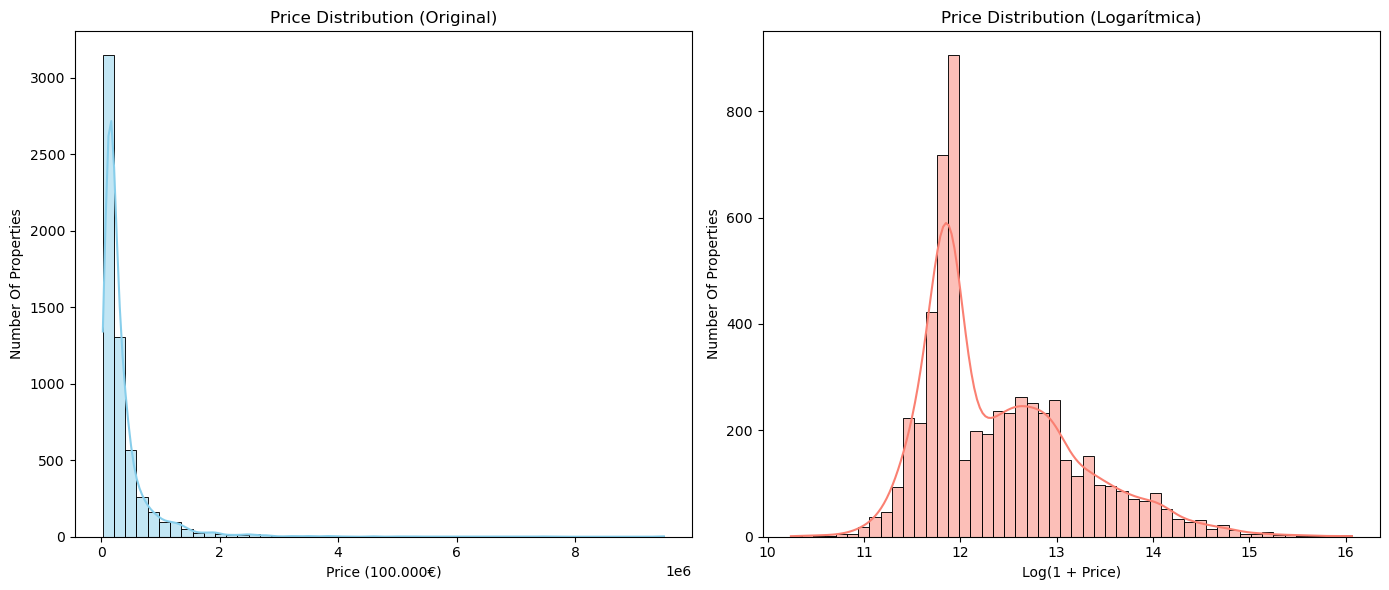

In [24]:
plt.figure(figsize=(14, 6))

# Histograma de precios originales
plt.subplot(1, 2, 1)
sns.histplot(dfbcn['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution (Original)')
plt.xlabel('Price (100.000€)')
plt.ylabel('Number Of Properties')

# Histograma de precios logarítmicos
plt.subplot(1, 2, 2)
sns.histplot(dfbcn['log_price'], bins=50, kde=True, color='salmon')
plt.title('Price Distribution (Logarítmica)')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Number Of Properties')

plt.tight_layout()
plt.show()

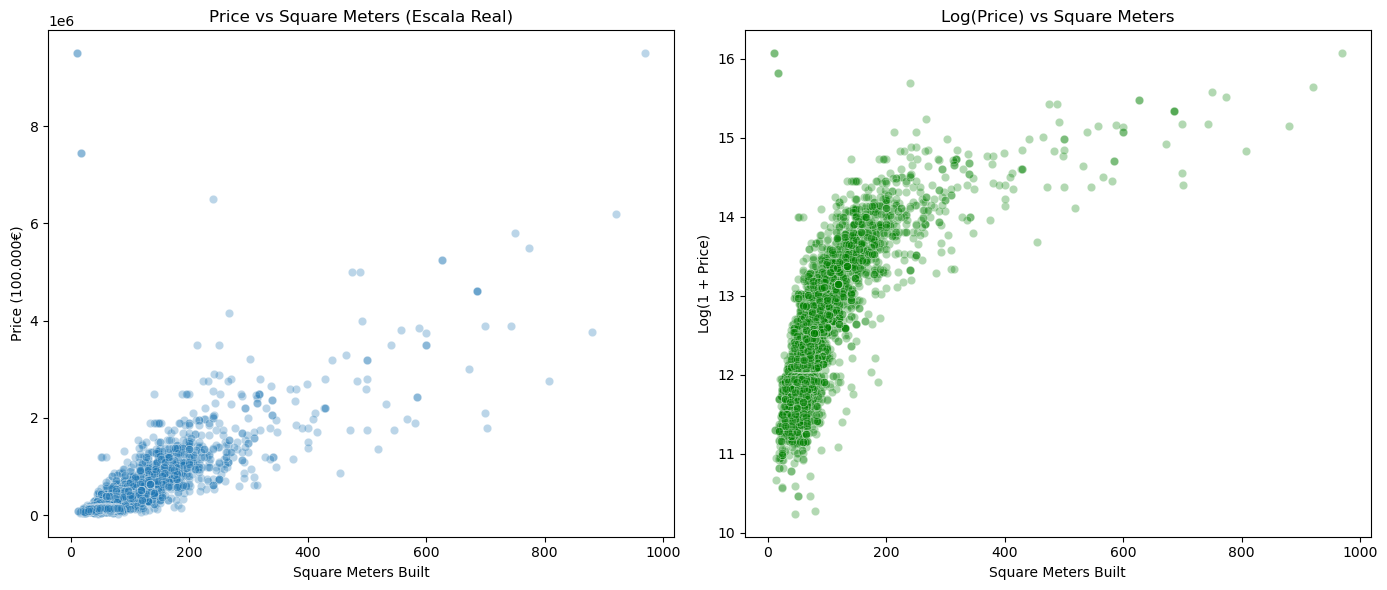

In [25]:
plt.figure(figsize=(14, 6))

# Scatterplot en escala real
plt.subplot(1, 2, 1)
sns.scatterplot(x='sq_meters_built', y='price', data=dfbcn, alpha=0.3)
plt.title('Price vs Square Meters (Escala Real)')
plt.xlabel('Square Meters Built')
plt.ylabel('Price (100.000€)')

# Scatterplot en escala logarítmica
plt.subplot(1, 2, 2)
sns.scatterplot(x='sq_meters_built', y='log_price', data=dfbcn, alpha=0.3, color='green')
plt.title('Log(Price) vs Square Meters')
plt.xlabel('Square Meters Built')
plt.ylabel('Log(1 + Price)')

plt.tight_layout()
plt.show()

Vemos que la mayoria de pisos en el dataset son del rango de entre 100k y 200k euros de precio. 

Cabe recalcar que cuando los pasamos a escala logarítmica los precios muestran menos dispersion y una tendencia clara en relación a los metros cuadrados construidos. 

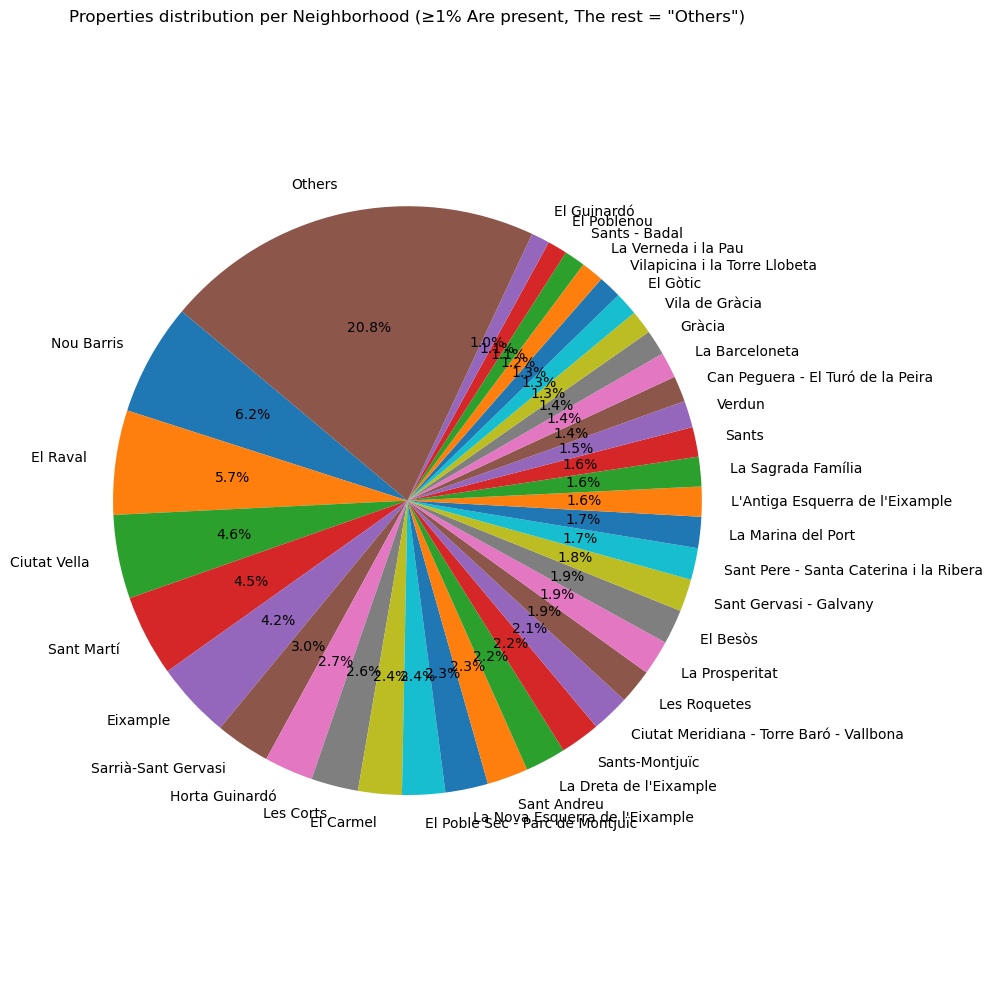

In [27]:
# We count the frequency of each neighborhood
neigh_counts = dfbcn['neighborhood'].value_counts(normalize=True)  
# We split the neighborhoods with >=1% of representation
main_neighs = neigh_counts[neigh_counts >= 0.01]

# we group them as "others"
others = neigh_counts[neigh_counts < 0.01].sum()

# We add everything together
pie_data = pd.concat([main_neighs, pd.Series({'Others': others})])

# We convert the proportions to percentages
pie_data_percent = pie_data * 100

# Graph the pie chart
plt.figure(figsize=(10, 10))
plt.pie(pie_data_percent, labels=pie_data_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Properties distribution per Neighborhood (≥1% Are present, The rest = "Others")')
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\166160120.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\166160120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


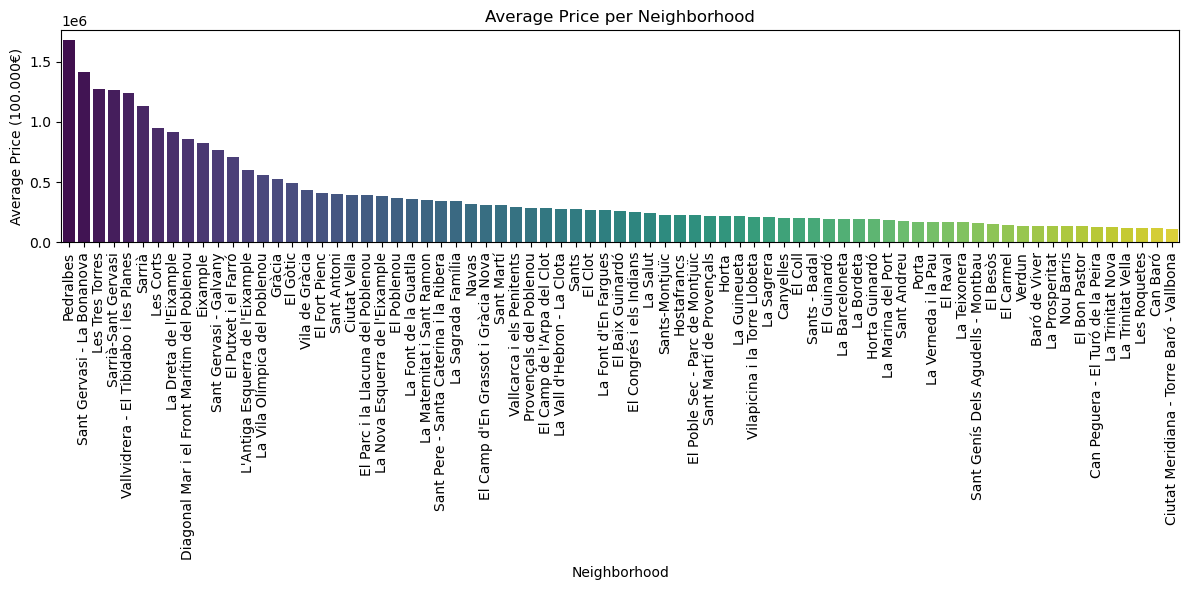

In [28]:
# Primero ordenamos los barrios por el precio medio en orden descendente
sorted_neighborhoods = dfbcn.groupby('neighborhood')['price'].mean().sort_values(ascending=False).index

# Luego graficamos el precio medio por barrio en orden descendente
plt.figure(figsize=(12, 6))
sns.barplot(
    y='price',
    x='neighborhood',
    data=dfbcn,
    estimator=np.mean,
    ci=None,
    palette='viridis',
    order=sorted_neighborhoods  # Ordenamos los barrios
)
plt.title('Average Price per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (100.000€)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

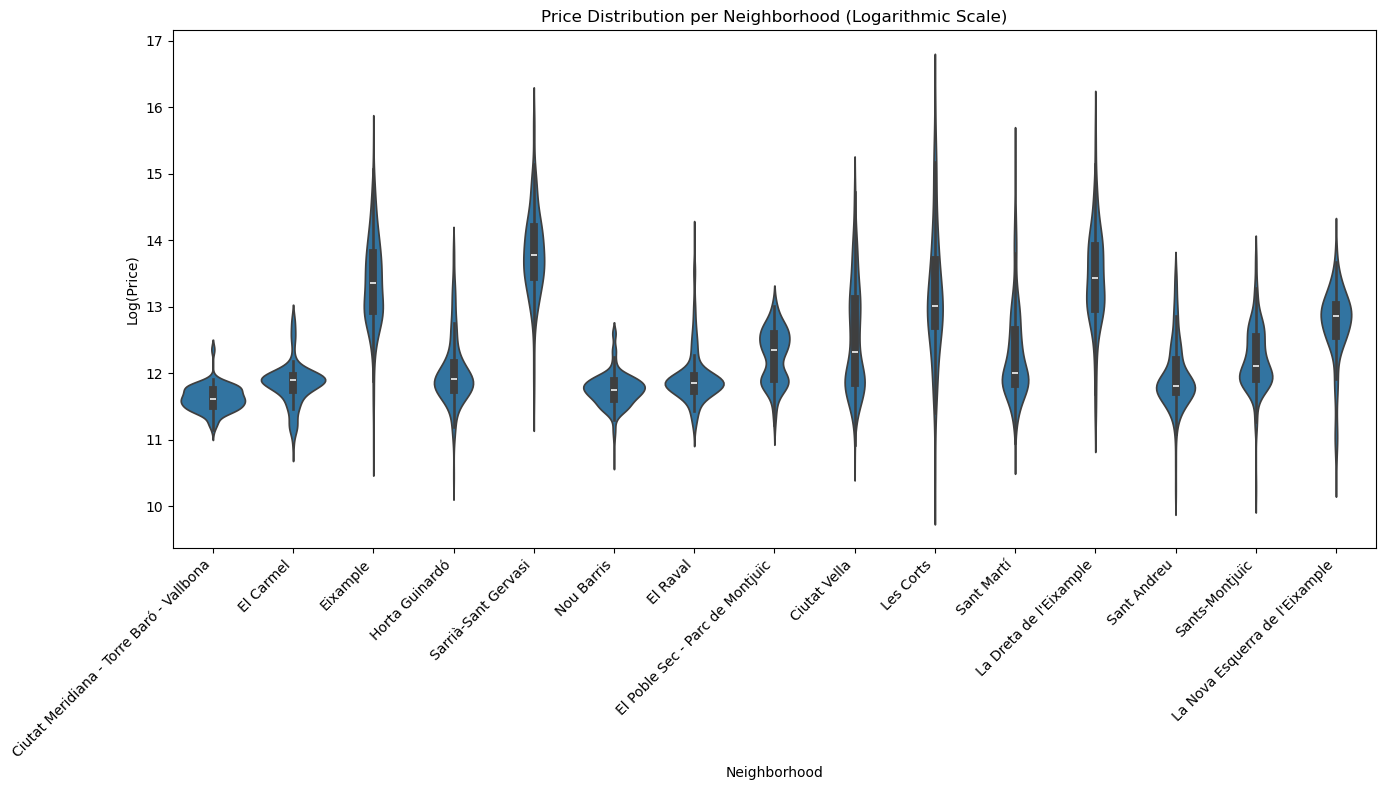

In [29]:
top_neighs = [
    "Nou Barris", "El Raval", "Ciutat Vella", "Sant Martí", "Eixample",
    "Horta Guinardó", "Sarrià-Sant Gervasi", "Les Corts", "El Carmel",
    "El Poble Sec - Parc de Montjuïc", "La Nova Esquerra de l'Eixample",
    "Sant Andreu", "La Dreta de l'Eixample", "Sants-Montjuïc",
    "Ciutat Meridiana - Torre Baró - Vallbona"
]

# Filtramos solo los barrios relevantes
df_violin = dfbcn[dfbcn['neighborhood'].isin(top_neighs)].copy()

# Transformamos el precio a logaritmo
df_violin['log_price'] = np.log1p(df_violin['price'])

# Gráfico
plt.figure(figsize=(14, 8))
sns.violinplot(x='neighborhood', y='log_price', data=df_violin, inner='box')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution per Neighborhood (Logarithmic Scale)')
plt.ylabel('Log(Price)')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\4171781663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


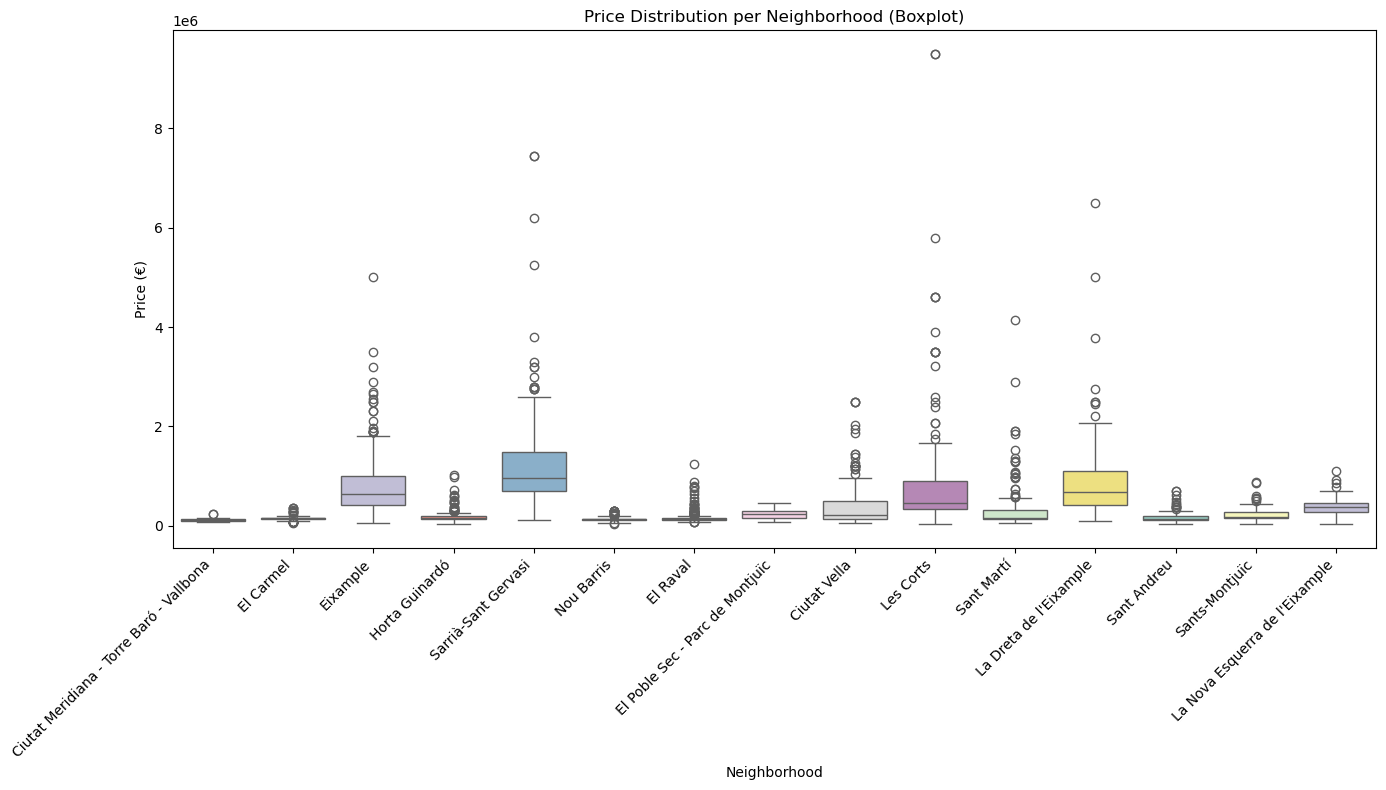

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=dfbcn[dfbcn['neighborhood'].isin(top_neighs)],
    x='neighborhood',
    y='price',
    palette='Set3'
)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution per Neighborhood (Boxplot)')
plt.xlabel('Neighborhood')
plt.ylabel('Price (€)')
plt.tight_layout()
plt.show()

Podemos apreciar tanto en el gráfico de violín, como la confirmación en los gráficos de caja, que en los barrios de Eixample, Sarria- Sant Gervasi, Les Corts, Sant Martí y La Dreta de l'Eixample la dispersión de precios es clara, lo que nos ayuda a determinar que tipo de zonas deberiamos excluir si queremos un modelo robusto. 

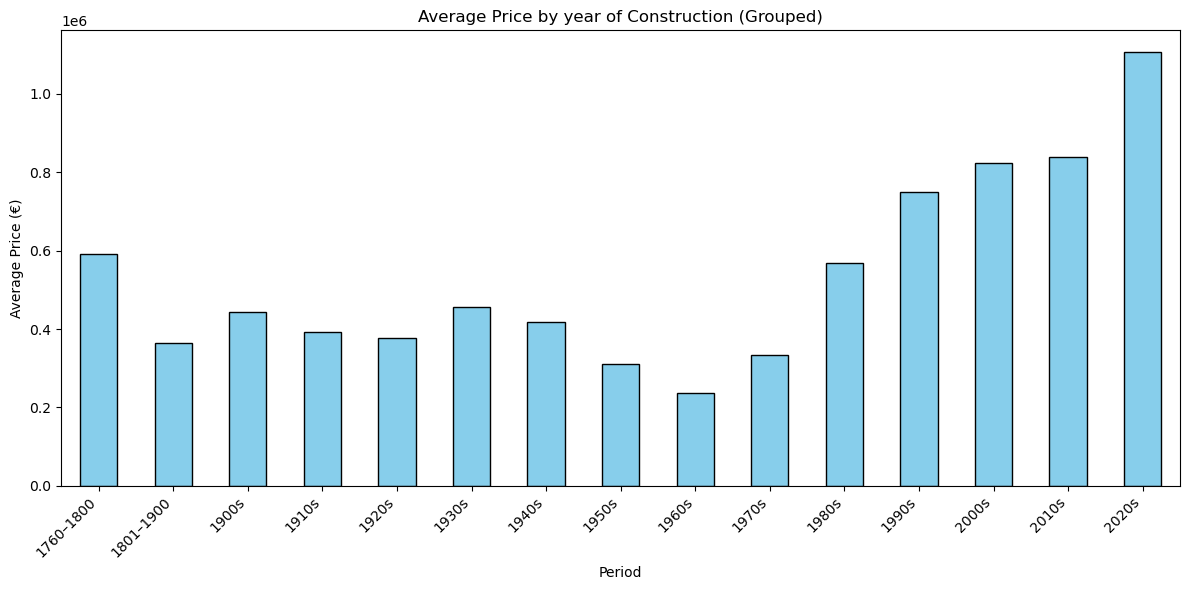

In [31]:
# Función para categorizar años
def group_years(year):
    if pd.isnull(year):
        return 'Desconocido'
    elif year <= 1800:
        return '1760–1800'
    elif year <= 1900:
        return '1801–1900'
    else:
        decade = (year // 10) * 10
        return f'{decade}s'

# Crear la nueva columna
dfbcn['year_group'] = dfbcn['year_built'].apply(group_years)

# Calcular el precio medio por grupo
avg_price_by_year_group = (
    dfbcn.groupby('year_group')['price']
    .mean()
    .reindex([
        '1760–1800', '1801–1900', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s'
    ])
)

# Graficar
plt.figure(figsize=(12, 6))
avg_price_by_year_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by year of Construction (Grouped)')
plt.xlabel('Period')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

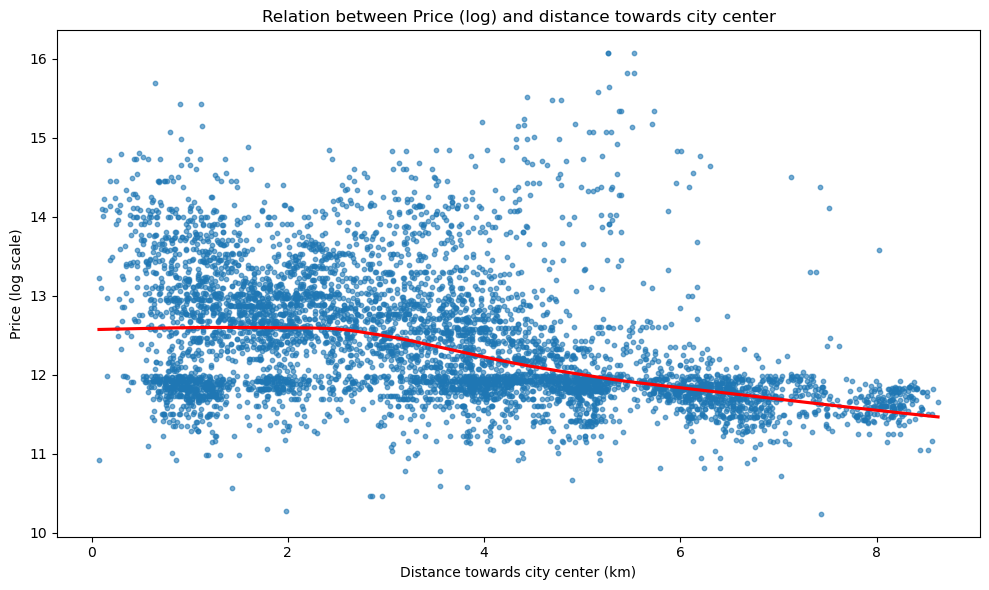

In [32]:
# Aplicamos la transformación logarítmica a la columna 'price'
dfbcn['log_price'] = np.log(dfbcn['price'])

# Creamos el gráfico de dispersión con la regresión ajustada (Lowess)
plt.figure(figsize=(10, 6))
sns.regplot(
    data=dfbcn,
    x='dist_city_center',
    y='log_price',
    scatter_kws={'s': 10, 'alpha': 0.6},
    line_kws={'color': 'red'},
    lowess=True
)
plt.title('Relation between Price (log) and distance towards city center')
plt.xlabel('Distance towards city center (km)')
plt.ylabel('Price (log scale)')
plt.tight_layout()
plt.show()


C:\Users\heatb\AppData\Local\Temp\ipykernel_23964\1930927947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


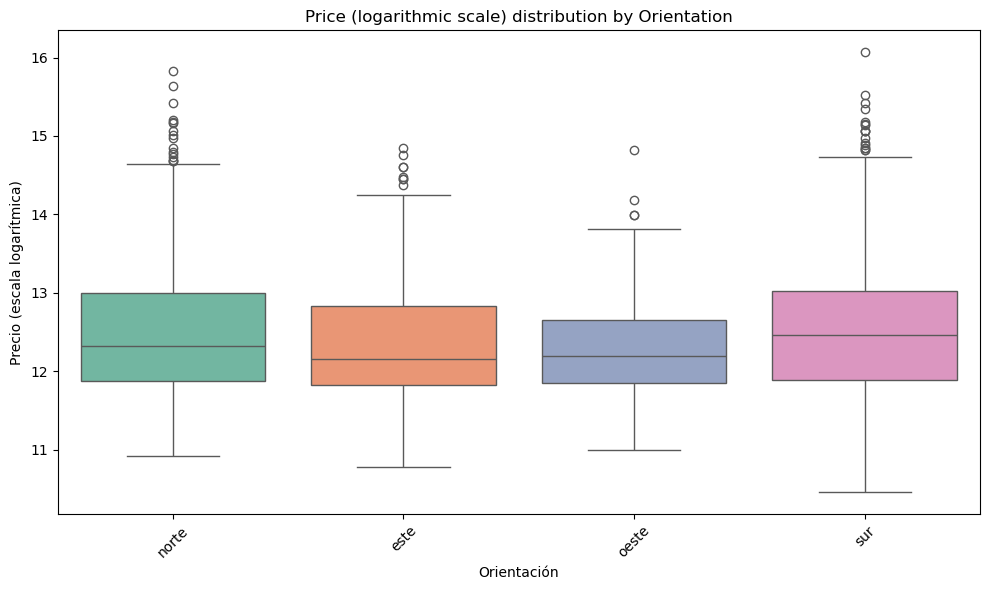

In [35]:
# Creamos el boxplot de precios (en escala logarítmica) por orientación
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dfbcn,
    x='orientation',
    y='log_price',
    order=['norte', 'este', 'oeste', 'sur'],  # Aseguramos que las orientaciones estén en orden
    palette='Set2'
)
plt.title('Price (logarithmic scale) distribution by Orientation')
plt.xlabel('Orientación')
plt.ylabel('Precio (escala logarítmica)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
